<img src="head.jpg" />

## Importing modules

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('seaborn')

## Read the Dataset-><a href="https://data.world/opensnippets/amazon-mobile-phones-reviews" target="_blank">Here</a>

In [88]:
df = pd.read_json('amazon_oneplus.json')
print("No. of Row :",df.shape[0],"\nNo. of Cols :",df.shape[1])

No. of Row : 30612 
No. of Cols : 20


## Performing EDA

In [89]:
df.head(5)

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,3,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,1,India,2020-08-03,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,na,na,na,electronics,mobiles,[]
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5.0 out of 5 stars,\n An amazing phone!,322 people found this helpful,1,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,bea91c43-8d65-5ef5-ab04-595a5f5cc542,Verified Purchase,na,na,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,vasu a.,Beast in OnePlus.,5.0 out of 5 stars,\n Brilliant..,243 people found this helpful,7,India,2020-08-02,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,76f68b53-5c52-56b2-9727-a5ab8c4bb4ff,Verified Purchase,na,na,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Changed to Nord from 6t,5.0 out of 5 stars,\n I was skeptical about changing from One pl...,109 people found this helpful,2,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,22228681-b884-56a1-b04e-87167f6f76e6,Verified Purchase,na,na,na,electronics,mobiles,[]


In [90]:
df.product_company.unique()

array(['OnePlus', 'Redmi'], dtype=object)

In [91]:
df1 = df[df['product_company'] == 'OnePlus'].sample(250)
df2 = df[df['product_company'] == 'Redmi'].sample(250)
t=df1.append(df2, ignore_index=True)
df=t
df['Id'] = range(1, len(df) + 1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7788\2580767222.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [92]:
df=t[['Id','product_company', 'profile_name','reviewed_at', 'review_title',
       'review_rating', 'review_text']]
df.head(2)

,Id,product_company,profile_name,reviewed_at,review_title,review_rating,review_text
0,1,OnePlus,suraj t.,2020-09-23,Oneplus,5.0 out of 5 stars,\n Awesome phone\n
1,2,OnePlus,Asvin Kannan,2020-08-31,2020 best smartphone,4.0 out of 5 stars,\n One Plus nord is great phone it's havin eq...


In [93]:
df["Review"] = df["review_title"] + df["review_text"]
df = df.drop(['review_title','review_text'], axis=1)

df['Rating'] = df['review_rating'].apply(lambda x: x.split(' ')[0])
df['Rating'] = df['Rating'].str.replace('.0', '')  
df['Rating'] = df['Rating'].astype(int)

df['year'] = df['reviewed_at'].dt.year

df['Review'] = df['Review'].str.replace('\n', '')

df = df.drop(['review_rating','reviewed_at'], axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7788\526499662.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_7788\526499662.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [94]:
print("No. of Row :",df.shape[0],"\nNo. of Cols :",df.shape[1])

No. of Row : 500 
No. of Cols : 6


In [95]:
df.head()

,Id,product_company,profile_name,Review,Rating,year
0,1,OnePlus,suraj t.,Oneplus Awesome phone,5,2020
1,2,OnePlus,Asvin Kannan,2020 best smartphone One Plus nord is great p...,4,2020
2,3,OnePlus,Sunil jaiswal,One plus nord for gaming Inpubg network iisss...,5,2020
3,4,OnePlus,Srikar,One of the best products from OnePlus Absolut...,5,2020
4,5,OnePlus,S,Gets heated up very fast I used Google maps n...,1,2020


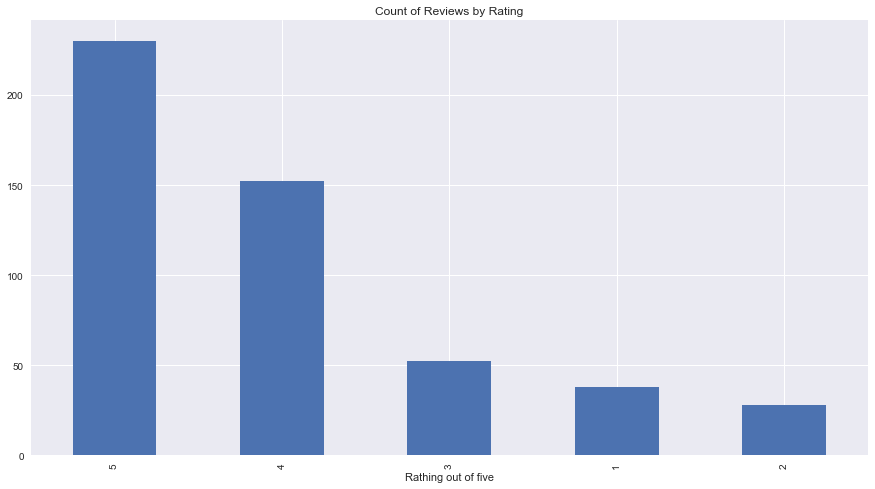

In [96]:
ax = df['Rating'].value_counts().sort_values(ascending=False) \
    .plot(kind='bar',
          title='Count of Reviews by Rating',
          figsize=(15, 8))
ax.set_xlabel('Rathing out of five')
plt.show()

Pie Plot

In [97]:
import plotly.express as px
counts = df['year'].value_counts()
fig = px.pie(values=counts, names=counts.index, title='Year vs Reviews')
fig.show()


Review with Rating 5

In [98]:
df[df['Rating'] ==5]

,Id,product_company,profile_name,Review,Rating,year
0,1,OnePlus,suraj t.,Oneplus Awesome phone,5,2020
2,3,OnePlus,Sunil jaiswal,One plus nord for gaming Inpubg network iisss...,5,2020
3,4,OnePlus,Srikar,One of the best products from OnePlus Absolut...,5,2020
6,7,OnePlus,Amazon Customer,Good Good,5,2020
9,10,OnePlus,Mahesh Chand Meena,Nice camera quality.good product Very good pr...,5,2020
...,...,...,...,...,...,...
486,487,Redmi,VINIT YADAV,Under 24 for hours delivered fantastic 👍👍 I l...,5,2020
489,490,Redmi,Robin Buthello,Excellent 👌 product must buy Xiaomi Redmi Not...,5,2020
491,492,Redmi,Prathamesh,Best Very good and low budget phone,5,2020
494,495,Redmi,Muthukumaran,Breathtaking! Best ever phone under 10k,5,2019


In [103]:
df[df['Rating'] ==5].count()[0]

230

Taking a Positive Sample

In [104]:
pexample = df['Review'][9]
print(pexample)

Nice camera quality.good product  Very good product.nice camera quality.


Review with Rating 1

In [101]:
df[df['Rating'] ==1]

,Id,product_company,profile_name,Review,Rating,year
4,5,OnePlus,S,Gets heated up very fast I used Google maps n...,1,2020
15,16,OnePlus,Sameer Kazi,Waste of money Don't buy this phone..got this...,1,2020
17,18,OnePlus,KN Babu,Useless Phone is ok .but there is reboot prob...,1,2020
19,20,OnePlus,Amazon Customer,Waste Overall not worth the money,1,2020
24,25,OnePlus,Unknown,Network issue Phone is having some network is...,1,2020
26,27,OnePlus,kishore ippili,Not bad Tuch is not proper,1,2020
50,51,OnePlus,SMIT,"Do not buy mobile with amazon online ,worst mo...",1,2020
52,53,OnePlus,Rajai Bhavik,Display tint issue Facing purple n green disp...,1,2020
54,55,OnePlus,deena,Camera quality not good Camera quality not go...,1,2020
66,67,OnePlus,Amazon Customer,Battery Drain Issue My OnePlus Nord mobile ha...,1,2020


In [34]:
df[df['Rating'] ==1].count()[0]

48

Taking a Negative Sample

In [108]:
nexample = df['Review'][182]
print(nexample)

Worst product from oneplus  Dont buy this phn


# ---------Stating Sentiment Analysis---------
### To Create a Sentiment Model
 
#### 1, Preprocess the text data
#### ----string replace and removing
#### ----stemmening
#### ----tokennization
#### ----stop words
#### ----POS tagging
#### ----NER
#### 2, Vectorize the text data
#### 3, Train a model
#### ----Rule-based approaches
#### ----Machine learning approaches
#### ----Hybrid approaches
#### 4, Test the model
#### 5, Predict the sentiment of new text

### "Just had the most amazing meal at @restaurant_name! The service was top-notch and the food was absolutely delicious. #foodie #yum #happy #satisfied 😋😍"

##  TextBlob

In [109]:
from textblob import TextBlob
text = "I love using TextBlob for sentiment analysis!"
blob = TextBlob(text)
print(blob.sentiment) 

Sentiment(polarity=0.625, subjectivity=0.6)


In [110]:
text = "I hate it!"
blob = TextBlob(text)
print(blob.sentiment) 

Sentiment(polarity=-1.0, subjectivity=0.9)


Checking for the Positive Example

In [111]:
print(pexample)
text=pexample
blob = TextBlob(text)
print(blob.sentiment) 

Nice camera quality.good product  Very good product.nice camera quality.
Sentiment(polarity=0.7549999999999999, subjectivity=0.8900000000000001)


Checking for the Negative Example

In [112]:
print(nexample)
text=nexample
blob = TextBlob(text)
print(blob.sentiment) 

Worst product from oneplus  Dont buy this phn
Sentiment(polarity=-1.0, subjectivity=1.0)


In [113]:
text = "Just had the most amazing meal at @restaurant_name! The service was top-notch and the food was absolutely delicious. #foodie #yum #happy #satisfied 😋😍"
blob = TextBlob(text) 
r=blob.sentiment
print(blob.sentiment) 

Sentiment(polarity=0.7583333333333333, subjectivity=0.9)


In [114]:
text='😍'
blob = TextBlob(text)
r=blob.sentiment
print(blob.sentiment) 

Sentiment(polarity=0.0, subjectivity=0.0)


In [115]:
text='#food @kochi'
blob = TextBlob(text)
r=blob.sentiment
print(blob.sentiment) 

Sentiment(polarity=0.0, subjectivity=0.0)


## VADER (Valence Aware Dictionary and sEntiment Reasoner) 

positive sentiment : (compound score >= 0.05) 

neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 

negative sentiment : (compound score <= -0.05)

In [116]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [117]:
sia.polarity_scores('I like this!')

{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.4199}

In [118]:
sia.polarity_scores('I like this!  #food  #cool @kochi')

{'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.4199}

In [119]:
sia.polarity_scores('I hate this!')

{'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}

In [120]:
sia.polarity_scores('I love using VADER for sentiment analysis! 😍')

{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}

In [121]:
text = "I love using VADER for sentiment analysis! 😍"
blob = TextBlob(text)
print(blob.sentiment) 

Sentiment(polarity=0.625, subjectivity=0.6)


In [122]:
print(pexample)
sia.polarity_scores(pexample)

Nice camera quality.good product  Very good product.nice camera quality.


{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.7178}

In [123]:
print(nexample)
sia.polarity_scores(nexample)

Worst product from oneplus  Dont buy this phn


{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [124]:
sia.polarity_scores('😍')

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [125]:
sia.polarity_scores('#food #love #happy #good @kochi')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Run the polarity score on the entire dataset

In [126]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [127]:
df1 = pd.DataFrame(res).T
df1 = df1.reset_index().rename(columns={'index': 'Id'})
df1 = df1.merge(df, how='left')

In [128]:
df1.head()

,Id,neg,neu,pos,compound,product_company,profile_name,Review,Rating,year
0,1,0.0,0.328,0.672,0.6249,OnePlus,suraj t.,Oneplus Awesome phone,5,2020
1,2,0.0,0.696,0.304,0.9286,OnePlus,Asvin Kannan,2020 best smartphone One Plus nord is great p...,4,2020
2,3,0.0,0.760,0.240,0.8360,OnePlus,Sunil jaiswal,One plus nord for gaming Inpubg network iisss...,5,2020
3,4,0.0,0.509,0.491,0.8655,OnePlus,Srikar,One of the best products from OnePlus Absolut...,5,2020
4,5,0.0,0.889,0.111,0.3612,OnePlus,S,Gets heated up very fast I used Google maps n...,1,2020


VADER Compound Score By Review

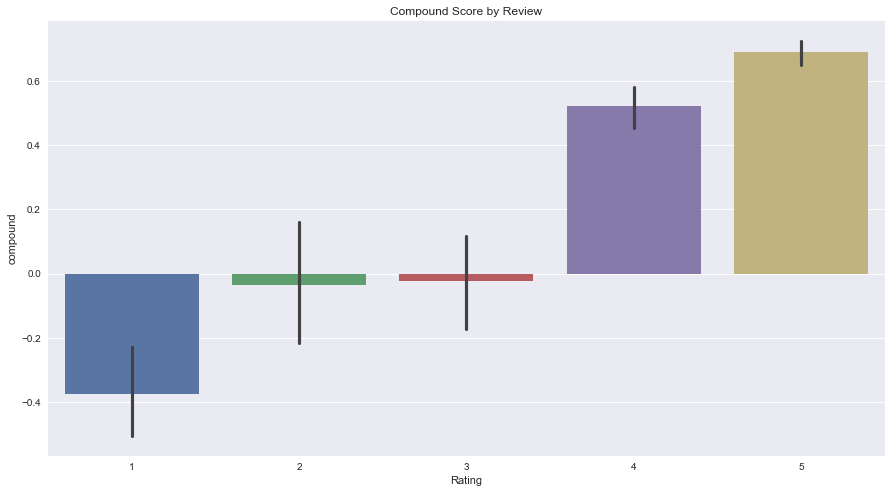

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df1, x='Rating', y='compound', ax=fig.gca())
ax.set_title('Compound Score by Review')
plt.show()

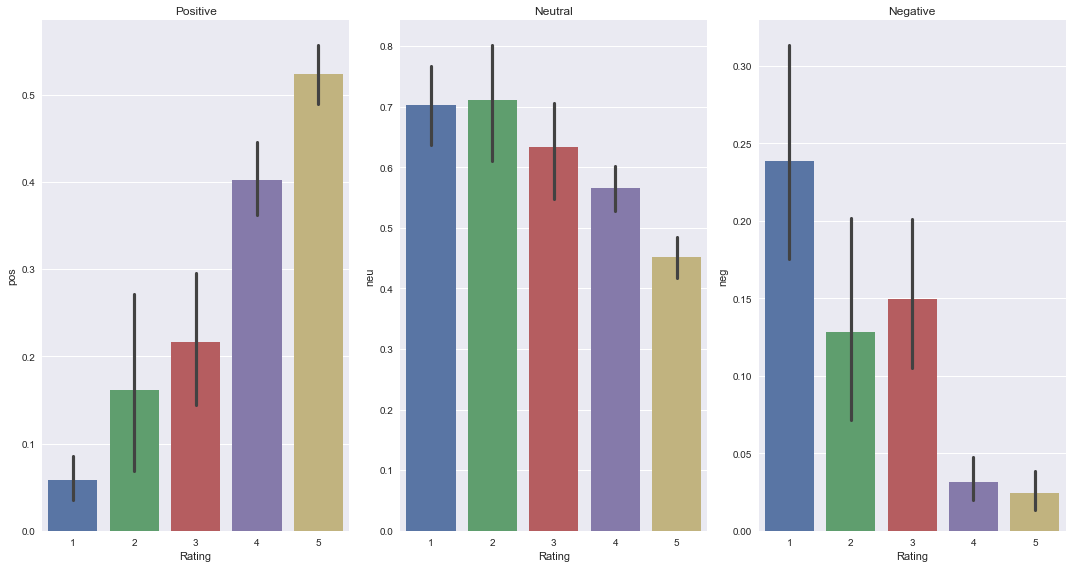

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
sns.barplot(data=df1, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=df1, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=df1, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Model
Twitter Roberta Base Sentiment Model

Hugging Face model->
<a href="https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment" target="_blank">link</a>

In [131]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Loading the Model

In [132]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

RoBerta Result on Emoji

In [133]:
text ='I love using Roberta for sentiment analysis! 😍'
encoded_text = tokenizer(text, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0014211949, 'roberta_neu': 0.011307179, 'roberta_pos': 0.9872717}


In [134]:
text = '😍'
encoded_text = tokenizer(text, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.020514732, 'roberta_neu': 0.16323356, 'roberta_pos': 0.81625175}


In [135]:
text = '👎😡🤑'
encoded_text = tokenizer(text, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.63880837, 'roberta_neu': 0.31810454, 'roberta_pos': 0.04308703}


In [136]:
text = '#food #love #happy #good @kochi'
encoded_text = tokenizer(text, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0012926505, 'roberta_neu': 0.029308438, 'roberta_pos': 0.969399}


Working on the Positive Example

In [137]:
print(pexample)
encoded_text = tokenizer(pexample, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

Nice camera quality.good product  Very good product.nice camera quality.
{'roberta_neg': 0.00587894, 'roberta_neu': 0.05508315, 'roberta_pos': 0.9390379}


Working on the Negative Example

In [138]:
print(nexample)
encoded_text = tokenizer(nexample, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

Worst product from oneplus  Dont buy this phn
{'roberta_neg': 0.95960045, 'roberta_neu': 0.035454985, 'roberta_pos': 0.0049444987}


Roberta Model apply on the dataset

In [139]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    compound_score = (scores[2] - scores[0]) / (scores[2] + scores[0] + scores[1])
    scores_dict['roberta_compound'] = compound_score
    return scores_dict

In [140]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['Id']
        roberta_result = polarity_scores_roberta(text)
        rob = {**roberta_result}
        res[myid] = rob
    except RuntimeError:
        print()

  0%|          | 0/500 [00:00<?, ?it/s]

In [141]:
df2 = pd.DataFrame(res).T
df2 = df2.reset_index().rename(columns={'index': 'Id'})
df2.head()
df2 = df2.merge(df1, how='left')

In [142]:
df2.rename(columns={'neg': 'vader_neg','neu': 'vader_neu','pos': 'vader_pos','compound': 'vader_compound'}, inplace=True)

In [143]:
df2.head(2)

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,vader_neg,vader_neu,vader_pos,vader_compound,product_company,profile_name,Review,Rating,year
0,1,0.001654,0.011787,0.986559,0.984905,0.0,0.328,0.672,0.6249,OnePlus,suraj t.,Oneplus Awesome phone,5,2020
1,2,0.001474,0.011138,0.987389,0.985915,0.0,0.696,0.304,0.9286,OnePlus,Asvin Kannan,2020 best smartphone One Plus nord is great p...,4,2020


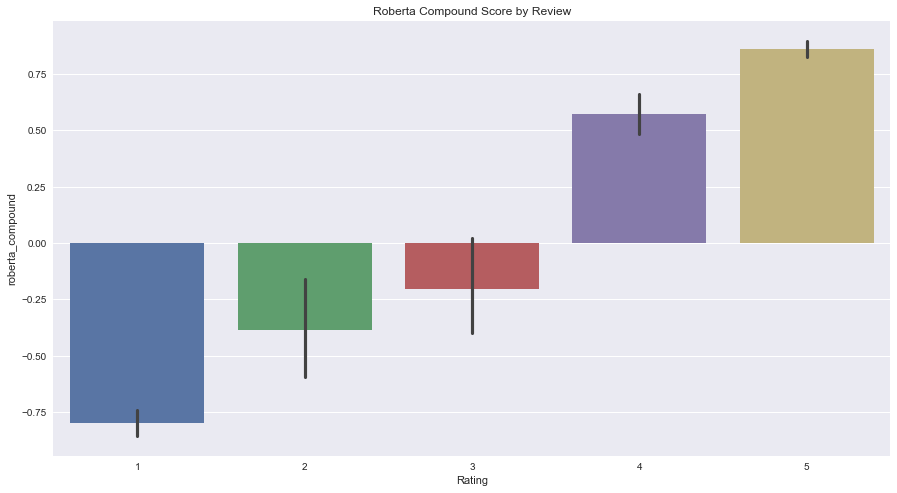

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df2, x='Rating', y='roberta_compound', ax=fig.gca())
ax.set_title('Roberta Compound Score by Review')
plt.show()

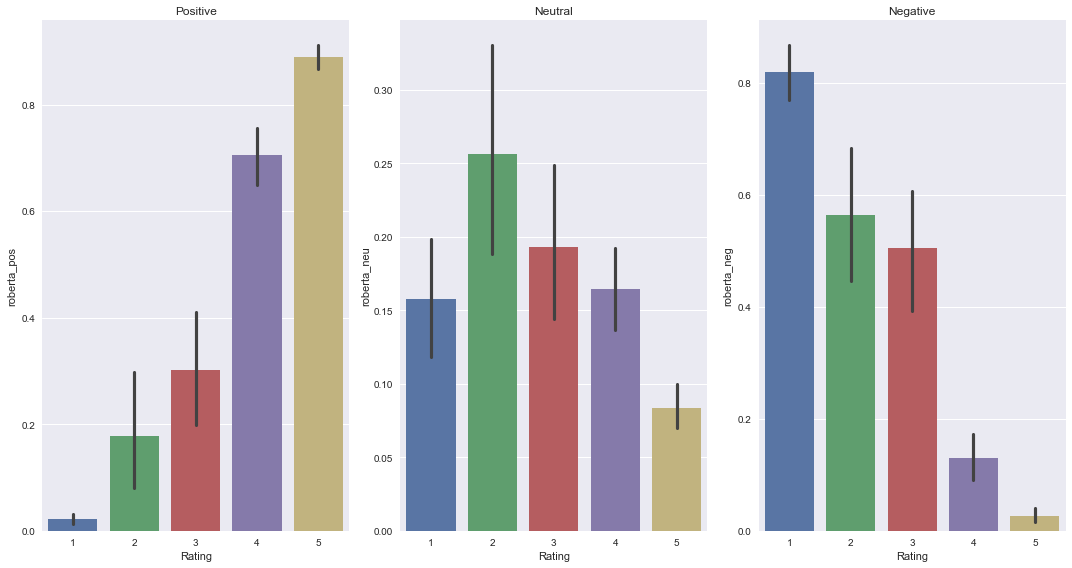

In [145]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
sns.barplot(data=df2, x='Rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=df2, x='Rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=df2, x='Rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [146]:
df2.head()

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,vader_neg,vader_neu,vader_pos,vader_compound,product_company,profile_name,Review,Rating,year
0,1,0.001654,0.011787,0.986559,0.984905,0.0,0.328,0.672,0.6249,OnePlus,suraj t.,Oneplus Awesome phone,5,2020
1,2,0.001474,0.011138,0.987389,0.985915,0.0,0.696,0.304,0.9286,OnePlus,Asvin Kannan,2020 best smartphone One Plus nord is great p...,4,2020
2,3,0.001582,0.030595,0.967823,0.966241,0.0,0.760,0.240,0.8360,OnePlus,Sunil jaiswal,One plus nord for gaming Inpubg network iisss...,5,2020
3,4,0.002123,0.009128,0.988749,0.986626,0.0,0.509,0.491,0.8655,OnePlus,Srikar,One of the best products from OnePlus Absolut...,5,2020
4,5,0.455505,0.426788,0.117707,-0.337798,0.0,0.889,0.111,0.3612,OnePlus,S,Gets heated up very fast I used Google maps n...,1,2020


## Sentiment Score Analysis

### CASE 1

### Taking Reviews having Rating 5 and High Roberta Positive Score

In [147]:
df2.query('Rating == 5')[['Id','product_company','Review','roberta_pos']].sort_values('roberta_pos', ascending=False).values[0]

array([350, 'Redmi',
       'All features all very awesome I am happy and satisfied this mobile  I am very happy with this mobile awesome features and fabulous mobile I love it😍😍',
       0.9928682446479797], dtype=object)

In [159]:
df2.query('Id == 350')[['Review','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos','roberta_compound']]

,Review,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound
349,All features all very awesome I am happy and s...,0.0,0.385,0.615,0.982,0.001764,0.005368,0.992868,0.991104


In [149]:
#######################################################

### CASE 2

### Taking Reviews having Rating 5 with RoBerta Negative Score

In [150]:
df2.query('Rating == 5')[['Id','product_company','Review','roberta_neg']].sort_values('roberta_neg', ascending=False).values[0]

array([63, 'OnePlus', 'Camera qwality bad  Cemra qwality bad',
       0.8225224018096924], dtype=object)

In [160]:
df2.query('Id == 63')[['Review','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos','roberta_compound']]

,Review,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound
62,Camera qwality bad Cemra qwality bad,0.636,0.364,0.0,-0.7906,0.822522,0.165976,0.011501,-0.811021


### CASE 3

### Taking Reviews having Rating 1 with RoBerta Positive Score

In [152]:
df2.query('Rating == 1')[['Id','Review','roberta_pos']].sort_values('roberta_pos', ascending=False).values[0]

array([27, 'Not bad  Tuch is not proper', 0.14247772097587585],
      dtype=object)

In [161]:
df2.query('Id == 27')[['Review','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos','roberta_compound']]

,Review,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound
26,Not bad Tuch is not proper,0.0,0.637,0.363,0.431,0.449685,0.407837,0.142478,-0.307207


###  CASE 4

### Taking Reviews having Rating 1 and high RoBerta Negative Score

In [154]:
df2.query('Rating == 1')[['Id','Review','roberta_neg']].sort_values('roberta_neg', ascending=False).values[0]

array([441,
       "It's spoil my mood hanging phone  The product quality is very hated and hand many times I also face a error in camera modes also so this phone is problem house not happy",
       0.9775307774543762], dtype=object)

In [162]:
df2.query('Id == 441')[['Review','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos','roberta_compound']]

,Review,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound
440,It's spoil my mood hanging phone The product ...,0.304,0.614,0.082,-0.8565,0.977531,0.020316,0.002153,-0.975378


# ---------------So Here Roberta working well--------------- 

In [156]:
df2.product_company.unique()

array(['OnePlus', 'Redmi'], dtype=object)

## Over all

In [157]:
overall_sentiment = df2["roberta_compound"].mean()
overall_Rating = df2["Rating"].mean()
print("Overall sentiment score: ", overall_sentiment)
print("Overall Rating: ", overall_Rating)

Overall sentiment score:  0.46762294
Overall Rating:  4.016


In [158]:
senti = df2.groupby("product_company")["roberta_compound"].mean()
rate = df2.groupby("product_company")["Rating"].mean()
print(senti)
print(rate)

product_company
OnePlus    0.413335
Redmi      0.521911
Name: roberta_compound, dtype: float32
product_company
OnePlus    3.980
Redmi      4.052
Name: Rating, dtype: float64


# ----------------------------END----------------------------